In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the train data

In [2]:
train_data = pd.read_csv('DataSet/train_v9rqX0R.csv')
train_data.shape, train_data.columns

((8523, 12),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'))

In [3]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Checking for nan values

In [5]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [7]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Filtering out indexes where Outlet_Size is na

In [8]:
grocery_stores = train_data[(train_data['Outlet_Type'] == "Grocery Store") & (train_data["Outlet_Size"].isna())].index

In [9]:
train_data.Outlet_Location_Type.unique()


array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [10]:
s1 = train_data[(train_data['Outlet_Location_Type'] == "Tier 2") & (train_data["Outlet_Size"].isna())] 

In [11]:
s2 = train_data[(train_data['Outlet_Type'] == "Supermarket Type1") & (train_data["Outlet_Size"].isna())]

In [12]:
train_data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [13]:
s2.equals(s1)

True

In [14]:
train_data[(train_data['Outlet_Type'] == "Supermarket Type1") & (train_data['Outlet_Location_Type'] == "Tier 2")]["Outlet_Size"].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [15]:
#train_data[(train_data['Outlet_Type'] == "Supermarket Type1") & (train_data['Outlet_Location_Type'] == "Tier 2")]["Outlet_Size"].fillna("small",inplace=True)

In [16]:
small_outlets = train_data[(train_data['Outlet_Type'] == "Supermarket Type1") & (train_data['Outlet_Location_Type'] == "Tier 2")].index

In [17]:
train_data.loc[small_outlets,'Outlet_Size'] = "Small"

In [18]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                   555
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
len(grocery_stores)

555

In [20]:
train_data[(train_data['Outlet_Type'] == "Grocery Store") & (train_data["Outlet_Size"].isna())]['Outlet_Location_Type']

3       Tier 3
28      Tier 3
30      Tier 3
45      Tier 3
65      Tier 3
         ...  
8400    Tier 3
8432    Tier 3
8473    Tier 3
8486    Tier 3
8509    Tier 3
Name: Outlet_Location_Type, Length: 555, dtype: object

In [21]:
train_data.loc[grocery_stores,'Outlet_Size'] = "Small"

In [22]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

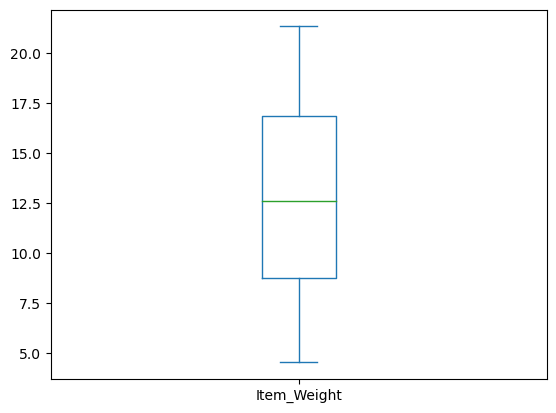

In [23]:
train_data.Item_Weight.plot(kind="box")

In [24]:
train_data.Item_Weight.skew()

0.0824262091221237

In [25]:
train_data[train_data.Item_Weight.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [26]:
train_data.Item_Weight.median()

12.6

In [27]:
train_data.Item_Weight.mean()

12.857645184135976

Filling Item_Weight nan values with median value

In [28]:
train_data.Item_Weight.fillna(train_data.Item_Weight.median(), inplace=True)

In [29]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

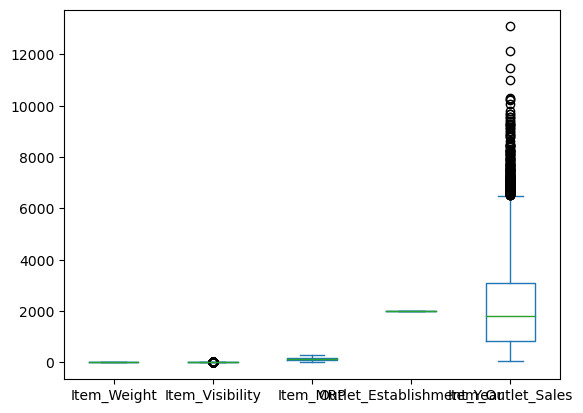

In [30]:
train_data.plot(kind="box")

Label Encoding the necessary column

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [33]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [34]:
columns_to_le = ["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

In [35]:
label_encoders = {}
for column in columns_to_le:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le

In [36]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [37]:
x = train_data.drop(columns=["Item_Identifier","Outlet_Identifier"], axis=1)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


Importing test data

In [38]:
test_data = pd.read_csv("DataSet/test_AbJTz2l.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [39]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [40]:
train_data.Item_Fat_Content.unique()

array([1, 2, 3, 0, 4])

Filtering out nan values and filling them with appropriate value

In [41]:
test_data[(test_data["Outlet_Size"].isna()) & (test_data["Outlet_Location_Type"] == "Tier 2")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
10,FDT44,16.600,Low Fat,0.103569,Fruits and Vegetables,118.3466,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5662,FDK22,9.800,Low Fat,0.026234,Snack Foods,214.3850,OUT017,2007,NaN,Tier 2,Supermarket Type1
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [42]:
test_data[(test_data["Outlet_Size"].isna())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [43]:
grocery_stores_test_index = test_data[(test_data["Outlet_Size"].isna()) & (test_data["Outlet_Location_Type"] == "Tier 3")].index

In [44]:
supermarket_test_index = test_data[(test_data["Outlet_Location_Type"] == "Tier 2") & (test_data["Outlet_Size"].isna())].index

In [45]:
test_data[test_data["Outlet_Type"] == "Supermarket Type1" ].Outlet_Size.value_counts()

Small     1240
High       621
Medium     620
Name: Outlet_Size, dtype: int64

In [46]:
test_data.loc[grocery_stores_test_index,"Outlet_Size"] = "Small"

In [47]:
test_data.loc[supermarket_test_index,"Outlet_Size"] = "Small"

In [48]:
test_data.Outlet_Size.value_counts()

Small     3198
Medium    1862
High       621
Name: Outlet_Size, dtype: int64

In [49]:
test_data.isna().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [50]:
test_data.Item_Weight.skew()

0.12997502891537796

In [51]:
test_data.Item_Weight.median()

12.5

In [52]:
test_data.Item_Weight.mean()

12.695633368756642

<Axes: >

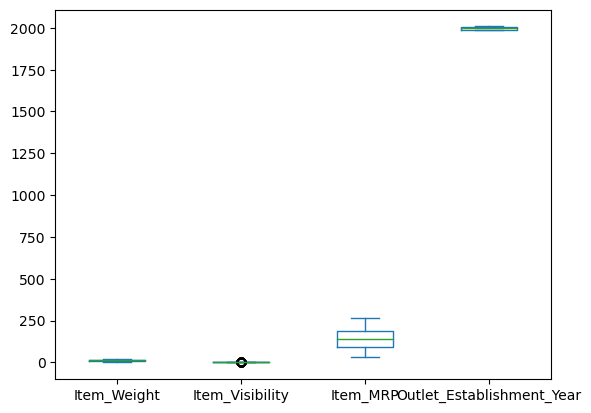

In [53]:
test_data.plot(kind="box")

In [54]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

<Axes: >

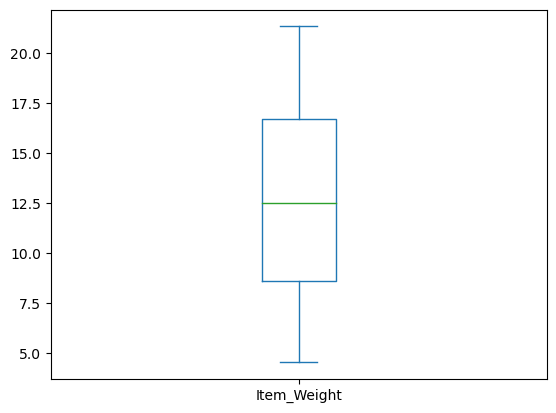

In [55]:
test_data.Item_Weight.plot(kind="box")

Filling nan values of weight coulumn with median 

In [56]:
test_data.Item_Weight.fillna(test_data.Item_Weight.median(), inplace=True)

In [57]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [58]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [59]:
label_encoders = {}
test_data[columns_to_le]

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,reg,Dairy,Small,Tier 2,Supermarket Type1
2,Low Fat,Others,Small,Tier 3,Grocery Store
3,Low Fat,Snack Foods,Small,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...
5676,Regular,Snack Foods,Small,Tier 1,Supermarket Type1
5677,Regular,Starchy Foods,Medium,Tier 3,Supermarket Type2
5678,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
5679,Regular,Canned,Small,Tier 2,Supermarket Type1


In [60]:
for column in columns_to_le:
    le = LabelEncoder()
    test_data[column] = le.fit_transform(test_data[column])
    label_encoders = le

In [61]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,2,1,1
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,2,2,0
3,FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,2,1,1
4,FDY38,12.500,2,0.118599,4,234.2300,OUT027,1985,1,2,3


Preparing tarining and testing data

In [62]:
x_train = train_data.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"], axis=1)
y_train = train_data["Item_Outlet_Sales"]

In [63]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,4,249.8092,1999,1,0,1
1,5.92,2,0.019278,14,48.2692,2009,1,2,2
2,17.50,1,0.016760,10,141.6180,1999,1,0,1
3,19.20,2,0.000000,6,182.0950,1998,2,2,0
4,8.93,1,0.000000,9,53.8614,1987,0,2,1


In [64]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [65]:
x_test = test_data.drop(columns=["Item_Identifier","Outlet_Identifier"], axis=1)
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1999,1,0,1
1,8.300,4,0.038428,4,87.3198,2007,2,1,1
2,14.600,1,0.099575,11,241.7538,1998,2,2,0
3,7.315,1,0.015388,13,155.0340,2007,2,1,1
4,12.500,2,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,1997,2,0,1
5677,7.600,2,0.142991,15,169.1448,2009,1,2,2
5678,10.000,1,0.073529,8,118.7440,2002,2,1,1
5679,15.300,2,0.000000,3,214.6218,2007,2,1,1


### Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rfrg = RandomForestRegressor(n_estimators=100, random_state=42)

In [67]:
rfrg.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred = rfrg.predict(x_test)

In [69]:
y_pred

array([1750.241724, 1295.893146,  675.780342, ..., 1795.269778,
       4734.077688, 1587.50023 ])

In [70]:
copy_of_test = test_data


In [71]:
copy_of_test["Item_Outlet_Sales"] = y_pred

In [72]:
copy_of_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [73]:
copy_of_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1,1750.241724
1,FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,2,1,1,1295.893146
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,2,2,0,675.780342
3,FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,2,1,1,2181.094220
4,FDY38,12.500,2,0.118599,4,234.2300,OUT027,1985,1,2,3,6046.063220
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2,0.013496,13,141.3154,OUT046,1997,2,0,1,2390.954380
5677,FDD47,7.600,2,0.142991,15,169.1448,OUT018,2009,1,2,2,2929.366866
5678,NCO17,10.000,1,0.073529,8,118.7440,OUT045,2002,2,1,1,1795.269778
5679,FDJ26,15.300,2,0.000000,3,214.6218,OUT017,2007,2,1,1,4734.077688


In [74]:
submission = copy_of_test.reset_index(drop=True)
submission

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1,1750.241724
1,FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,2,1,1,1295.893146
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,2,2,0,675.780342
3,FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,2,1,1,2181.094220
4,FDY38,12.500,2,0.118599,4,234.2300,OUT027,1985,1,2,3,6046.063220
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2,0.013496,13,141.3154,OUT046,1997,2,0,1,2390.954380
5677,FDD47,7.600,2,0.142991,15,169.1448,OUT018,2009,1,2,2,2929.366866
5678,NCO17,10.000,1,0.073529,8,118.7440,OUT045,2002,2,1,1,1795.269778
5679,FDJ26,15.300,2,0.000000,3,214.6218,OUT017,2007,2,1,1,4734.077688


In [75]:
submission.set_index("Item_Identifier", inplace=True)

### Bagging Regressor With Decision Tree Regressor

In [76]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


In [77]:
base_model = DecisionTreeRegressor()

In [78]:
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)
bagging_model.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

In [79]:
y_pred = bagging_model.predict(x_test)

In [80]:
y_pred

array([1784.357316, 1305.647116,  666.718804, ..., 1813.113218,
       4652.683638, 1589.9304  ])

### SVM Regressor

In [81]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)

SVR()

In [82]:
y_pred = svr_model.predict(x_test)
y_pred

array([1786.22954943, 1783.11350487, 1806.4601641 , ..., 1787.87247254,
       1802.37701119, 1781.9755078 ])

### Xg boost Regressor

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
import xgboost as xgb
xg_model = xgb_model = xgb.XGBRegressor(objective='reg:squaredlogerror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [85]:
xg_model.fit(x_train, y_train)
y_pred = xg_model.predict(x_test)
y_pred

array([171.23827, 171.15935, 131.05545, ..., 171.23827, 171.23827,
       171.15935], dtype=float32)

In [86]:
copy_of_test["Item_Outlet_Sales"] = y_pred

In [87]:
copy_of_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1,171.238266
1,FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,2,1,1,171.159348
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,2,2,0,131.055450
3,FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,2,1,1,171.238266
4,FDY38,12.500,2,0.118599,4,234.2300,OUT027,1985,1,2,3,171.238266
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2,0.013496,13,141.3154,OUT046,1997,2,0,1,171.238266
5677,FDD47,7.600,2,0.142991,15,169.1448,OUT018,2009,1,2,2,171.238266
5678,NCO17,10.000,1,0.073529,8,118.7440,OUT045,2002,2,1,1,171.238266
5679,FDJ26,15.300,2,0.000000,3,214.6218,OUT017,2007,2,1,1,171.238266


In [88]:
# copy_of_test.to_csv("Xgboost1.csv")

In [89]:
copy_of_test[copy_of_test.Item_Outlet_Sales < 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Gradient Boost Regressor

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
y_pred

array([1663.07349404, 1410.79491099,  551.60715109, ..., 1819.14554154,
       3805.57286028, 1260.64568942])

In [91]:
copy_of_test.Item_Outlet_Sales = y_pred

In [92]:
# copy_of_test.to_csv("Gradientboostresgressor.csv")

In [93]:
copy_of_test[copy_of_test.Item_Outlet_Sales < 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2212,FDQ20,8.325,1,0.049854,6,41.6138,OUT010,1998,2,2,0,-7.058923
4136,FDS60,20.850,1,0.054312,0,179.7660,OUT010,1998,2,2,0,-246.530333
4653,FDV58,20.850,0,0.202948,13,197.4452,OUT010,1998,2,2,0,-250.735204
5071,FDZ40,8.935,1,0.067258,5,53.3298,OUT010,1998,2,2,0,-41.448470


### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

array([1948.00709918, 1269.56527217, 2206.15311148, ..., 1587.99675803,
       3249.23272903,  968.04110726])

### Random Forest With Hyper Parameters

In [95]:
rfrg = RandomForestRegressor(max_depth= 10,
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 100)

In [96]:
rfrg.fit(x_train, y_train)
y_pred = rfrg.predict(x_test)
y_pred

array([1625.50842854, 1302.72520391,  677.26974954, ..., 1863.7965792 ,
       4115.82860161, 1358.75037581])

In [97]:
copy_of_test.Item_Outlet_Sales = y_pred
copy_of_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,1,0.007565,13,107.8622,OUT049,1999,1,0,1,1625.508429
1,FDW14,8.300,4,0.038428,4,87.3198,OUT017,2007,2,1,1,1302.725204
2,NCN55,14.600,1,0.099575,11,241.7538,OUT010,1998,2,2,0,677.269750
3,FDQ58,7.315,1,0.015388,13,155.0340,OUT017,2007,2,1,1,2383.532856
4,FDY38,12.500,2,0.118599,4,234.2300,OUT027,1985,1,2,3,6087.078944
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,2,0.013496,13,141.3154,OUT046,1997,2,0,1,2272.018953
5677,FDD47,7.600,2,0.142991,15,169.1448,OUT018,2009,1,2,2,2827.132645
5678,NCO17,10.000,1,0.073529,8,118.7440,OUT045,2002,2,1,1,1863.796579
5679,FDJ26,15.300,2,0.000000,3,214.6218,OUT017,2007,2,1,1,4115.828602


In [98]:
copy_of_test.drop(columns=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'], axis =1, inplace=True)


In [99]:
copy_of_test.set_index('Item_Identifier', inplace=True)

In [100]:
copy_of_test.to_csv("Final submission random forest.csv")